#Detecting Emotions from Facial Images using CNNs

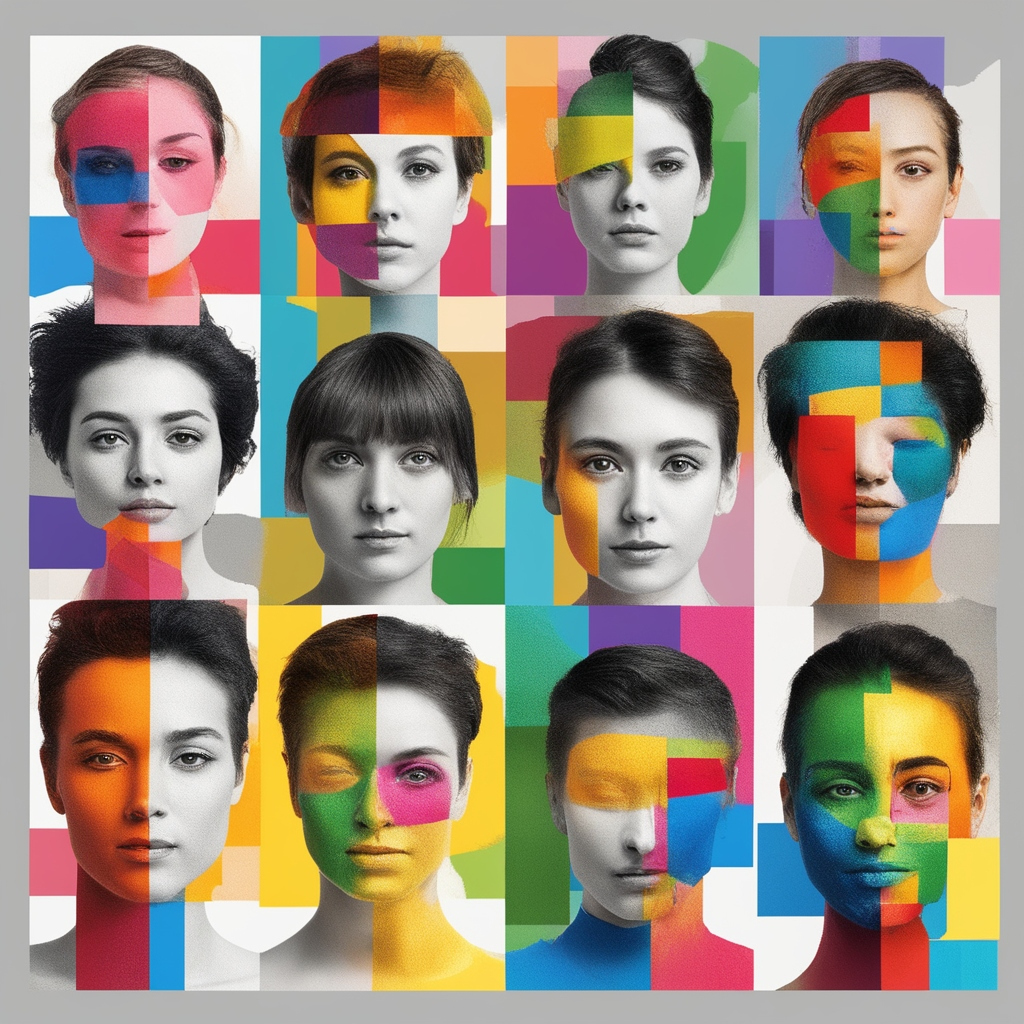



---



##Overview

This project focuses on facial emotion recognition using Convolutional Neural Networks (CNNs). Employing Python, we use libraries such as TensorFlow and Keras for building, training, and evaluating the CNN model.

The dataset, FER2013, is processed using OpenCV, and the project explores real-time emotion detection from webcam input.



---



##Dataset

###Overview

The FER2013 dataset contains a total of 35,887 grayscale, 48x48-pixel images of facial expressions. The original split is approximately 80% for training and 20% for testing. This means that there are around 28,709 images in the training set and approximately 7,178 images in the testing set.

###Labels

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

###Limitations

The FER2013 dataset used for facial expression recognition presents challenges due to its limited variability in poses and illumination conditions. Imbalanced class distribution further complicates model training, potentially leading to biased results. These limitations underscore the need for caution in generalizing findings to real-world scenarios with diverse expressions and lighting conditions.



---



##CNN Model Building in Python

###Import the required Libraries

In [142]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.src.optimizers import Adam
from keras.utils import to_categorical



---



###Create a function to load images

In [143]:
def load_images_from_folder(folder):
    images = []
    labels = []
    # mapping emotions to int values
    emotion_mapping = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}

    for emotion_label in os.listdir(folder):
        label = emotion_mapping.get(emotion_label)
        if label is not None:
            emotion_folder = os.path.join(folder, emotion_label)
            for filename in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (48, 48))
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)



---



###Visaulise data

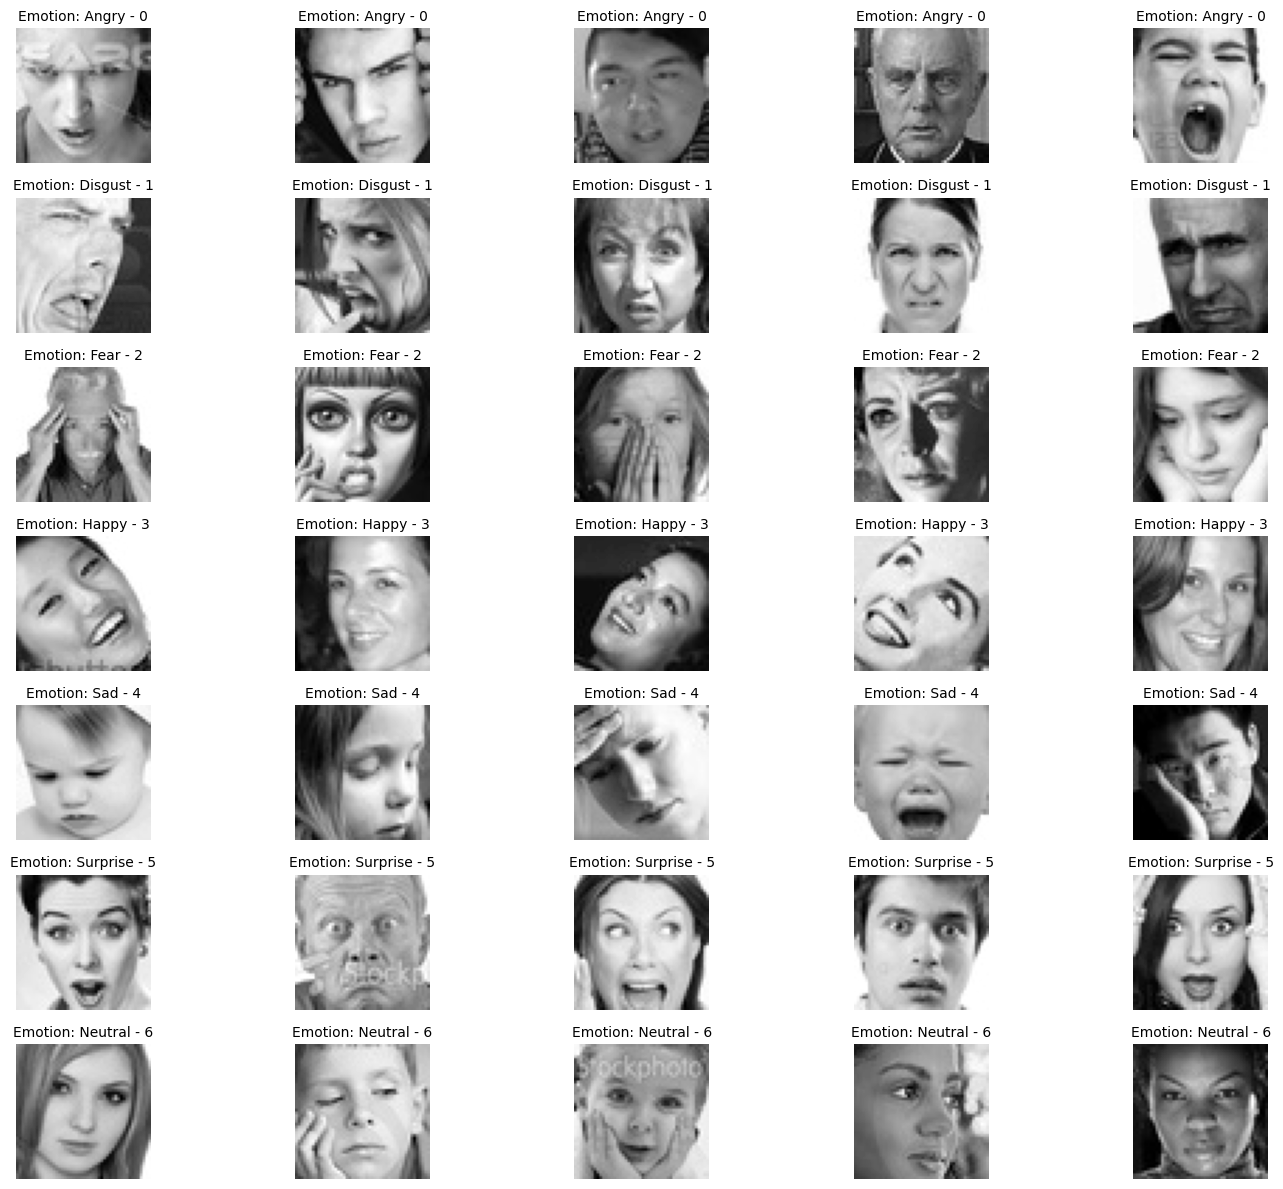

In [151]:
# Function to visualize the data
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def visualize_data(X, y, num_per_emotion=5):
    rows = 7
    cols = num_per_emotion

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))

    for row in range(rows):
        emotion_indices = np.where(y == row)[0]
        selected_indices = np.random.choice(emotion_indices, size=num_per_emotion, replace=False)

        for col, img_index in enumerate(selected_indices):
            img = X[img_index].reshape(48, 48)
            label = emotions[row]

            axes[row, col].imshow(img, cmap='gray')
            axes[row, col].set_title(f"Emotion: {label} - {row}", fontsize=10)
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


# Load images from 'train' folder for visualization
X_visualize, y_visualize = load_images_from_folder('/content/train')
visualize_data(X_visualize, y_visualize, num_per_emotion=5)

###Load Training and Testing Data

In [145]:
X_train, y_train = load_images_from_folder('train')
X_test, y_test = load_images_from_folder('test')

###Pre-Process the Data

In [146]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)



---



###Augment the Data

In [147]:
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

*Data augmentation is applied in this project to enhance model performance. It introduces dataset variations, improving model robustness and achieving a 60% validation accuracy. This ensures better generalization to diverse facial expressions and real-world conditions.*



---



###Build the Model

In [148]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 output classes for the 7 emotions

CNN Model Architecture

    Input Layer:
        Type: Conv2D
        Filters: 64
        Kernel Size: (3, 3)
        Activation Function: ReLU
        Input Shape: (48, 48, 1)

    Hidden Layer 1:
        Type: Conv2D
        Filters: 64
        Kernel Size: (3, 3)
        Activation Function: ReLU

    Pooling Layer:
        Type: MaxPooling2D
        Pool Size: (2, 2)

    Dropout Layer:
        Rate: 0.25 (25% dropout)

    Hidden Layer 2:
        Type: Conv2D
        Filters: 128
        Kernel Size: (3, 3)
        Activation Function: ReLU

    Hidden Layer 3:
        Type: Conv2D
        Filters: 128
        Kernel Size: (3, 3)
        Activation Function: ReLU

    Pooling Layer:
        Type: MaxPooling2D
        Pool Size: (2, 2)

    Dropout Layer:
        Rate: 0.25 (25% dropout)

    Flatten Layer:
        Type: Flatten

    Fully Connected Layer (Dense):
        Units: 1024
        Activation Function: ReLU

    Dropout Layer:
        Rate: 0.5 (50% dropout)

    Output Layer:
        Type: Dense
        Units: 7 (assuming this is a classification task with 7 classes)
        Activation Function: Softmax

This architecture consists of convolutional layers to extract features, pooling layers to reduce spatial dimensions, dropout layers for regularization, and fully connected layers for classification. The softmax activation in the output layer is used for multi-class classification.


###Compile the Model

In [149]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



---



###Train the Model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))



---



###Save the Model in HD5 Format

In [ ]:
model.save('emotion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



##CNN Model Real Time Testing

###Import Required Libraries

In [ ]:
import cv2
from keras.models import load_model
import numpy as np

###Define Emotion Labels

In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

###Load Pre-trained Face detection and emotion recognition models

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_model = load_model('emotion_model.h5')

###Function to Detect and Classify Emotions

In [ ]:
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Initialize emotion_label outside the loop
    emotion_label = 'No Face Detected'

    for (x, y, w, h) in faces:
        face_roi = gray[y:y + h, x:x + w]
        face_roi = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)
        face_roi = face_roi.astype("float") / 255.0
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.reshape(face_roi, (1, 48, 48, 1))

        emotion_prediction = emotion_model.predict(face_roi)[0]
        emotion_index = np.argmax(emotion_prediction)

        # Handle uncertain predictions
        if emotion_prediction[emotion_index] < 0.5:
            emotion_label = 'Uncertain'
        else:
            emotion_label = emotion_labels[emotion_index]

        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return frame, emotion_label



###Test with WebCam

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame, emotion_label = detect_emotion(frame)

    cv2.imshow('Emotion Detection', frame)

    # Press 'Esc' to exit the loop
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()